In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [2]:
#讀檔
dataset = pd.read_csv('input/titanic.csv')
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#觀察資料幾列幾行
#請輸入程式碼
dataset.shape

(891, 12)

In [4]:
#觀察整個資料集的資訊
#請輸入程式碼
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#設定seaborn為預設繪圖library
#請輸入程式碼
sns.set()

In [6]:
def bar_chart(feature):
    #請輸入程式碼
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

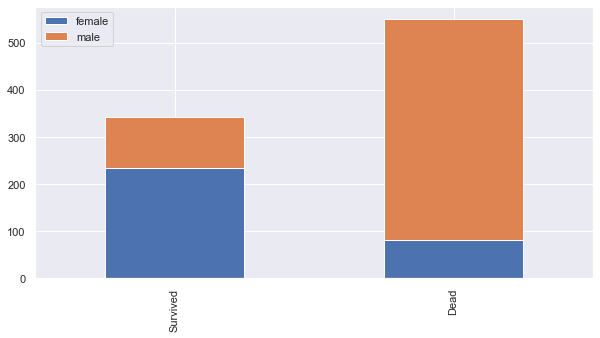

In [7]:
#分別秀出生還/死亡的男女長條圖
#請輸入程式碼
bar_chart('Sex')

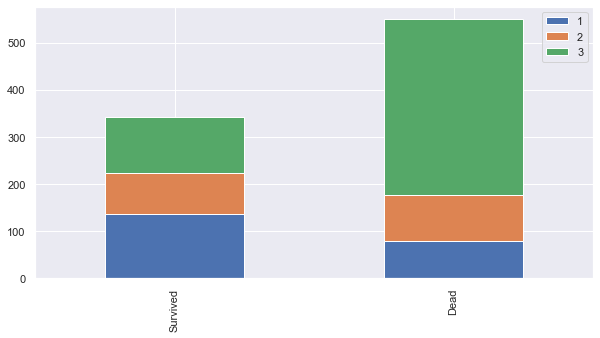

In [8]:
#分別秀出生還/死亡的艙等長條圖
#請輸入程式碼
bar_chart('Pclass')

In [9]:
# 計算各個行(欄位)裡有多少個“NaN”
#請輸入程式碼
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [10]:
#觀察Name欄位
#請輸入程式碼
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#取出Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [12]:
#統計各稱謂的人數
#請輸入程式碼
dataset["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Don           1
Countess      1
Jonkheer      1
Ms            1
Sir           1
Mme           1
Lady          1
Name: Title, dtype: int64

In [13]:
#titlemapping
dataset['Title'] = dataset['Title'].replace({'Dr':'Master', 'Rev':'Master','Mlle':'Master','Col':'Master','Major':'Master','Jonkheer':'Master','Countess':'Master','Ms':'Master','Don':'Master','Sir':'Master','Lady':'Master','Mme':'Master','Capt':'Master'})
title_mapping = {"Mr": 0,"Miss": 1,"Mrs": 2,"Master": 3}
dataset['Title'] = dataset['Title'].map(title_mapping)

In [103]:
#現在的dataset
dataset

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1,1.0,1.0,0.4,0,1,0.0
888,0,3,1,1.0,1.0,2.0,0,1,1.2
889,1,1,0,1.0,1.0,0.8,1,0,0.0


In [15]:
#現在的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


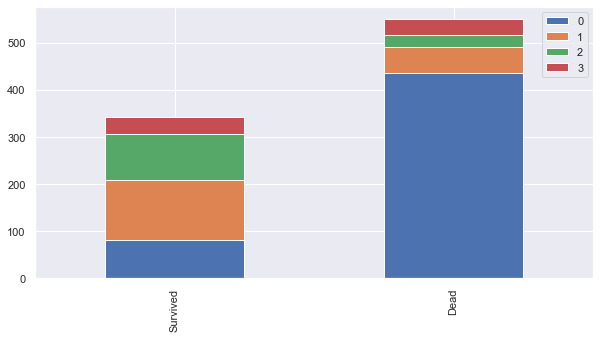

In [16]:
#秀出Title/生還死亡的分佈
bar_chart('Title')

In [17]:
# 刪除Name欄位
#請輸入程式碼
dataset.drop('Name',axis=1,inplace = True)

In [18]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# Sex

In [19]:
#mapping sex
#請輸入程式碼
sex_mapping = {'male':0, 'female':1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

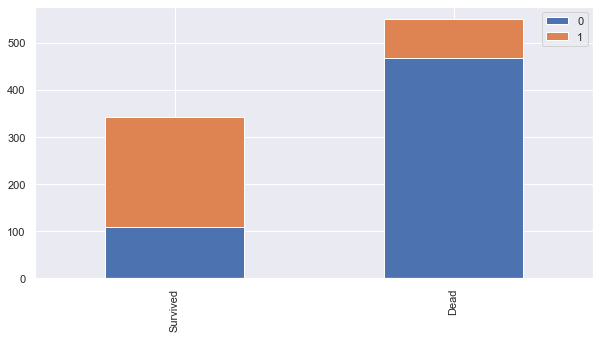

In [20]:
bar_chart('Sex')

In [21]:
#目前的ddataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


# Age

In [22]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
#請輸入程式碼
dataset['Age'].fillna(dataset.groupby("Title")["Age"].transform('median'), inplace = True)
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

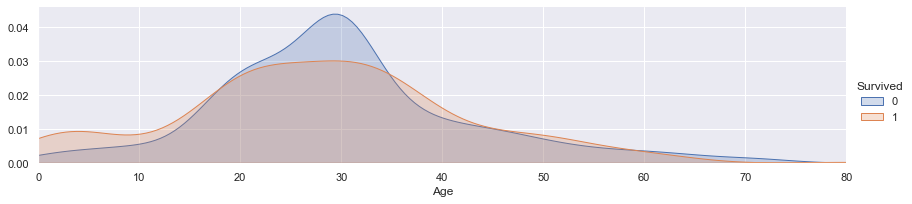

In [23]:
#年齡/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [24]:
#依年齡區間做mapping function
#請輸入程式碼
dataset.loc[dataset['Age']<= 16,'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26),'Age'] = 1
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36),'Age'] = 2
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62),'Age'] = 3
dataset.loc[dataset['Age'] > 62,'Age'] = 4

In [25]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


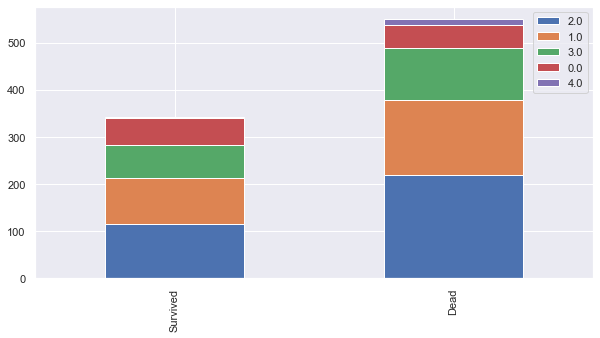

In [26]:
#秀出年齡/生還死亡的分佈
#請輸入程式碼
bar_chart('Age')

# Embarked (登船地點)

<AxesSubplot:>

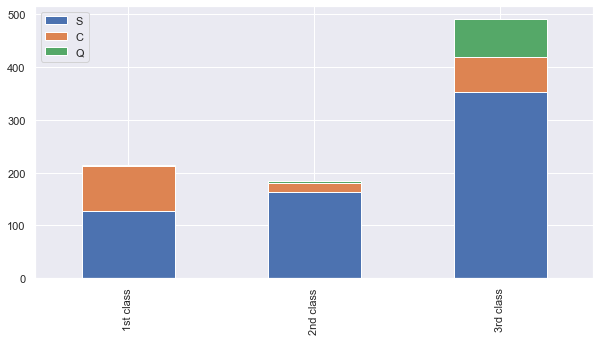

In [27]:
#分析各票種登船地點人數
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [28]:
#填補登船地點缺失資料
#請輸入程式碼
dataset["Embarked"] = dataset["Embarked"].fillna("S")
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2


In [29]:
# 登船地點的Mapping Function
#請輸入程式碼
embarked_mapping = {'S':0, 'C':1,'Q':2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2


# Fare(票價)

In [30]:
#填補票價缺失的資料 
#請輸入程式碼
dataset['Ticket'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'),inplace=True)
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


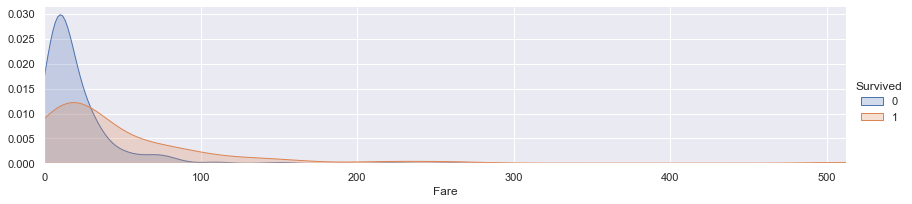

In [31]:
#票價/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [32]:
#依票價區間做mapping function
#請輸入程式碼
dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30),'Fare'] = 1
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100),'Fare'] = 2
dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [33]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [34]:
#觀察船艙編號資料
#請輸入程式碼
dataset['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
C50            1
E34            1
A23            1
C110           1
D47            1
Name: Cabin, Length: 147, dtype: int64

In [35]:
#觀察船艙編號資料 =>取出第一個字母
#請輸入程式碼
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot:>

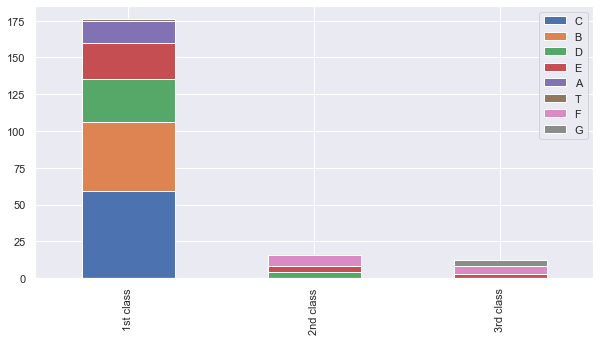

In [36]:
#分析各票種船艙種類人數
#請輸入程式碼
Pclass1 = dataset[dataset['Pclass']==1]["Cabin"].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]["Cabin"].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]["Cabin"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
#船艙Mapping
#請輸入程式碼
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,0.0,NaN,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,NaN,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0


In [38]:
#填補船艙種類缺失資料
#請輸入程式碼
dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [39]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


# Sibsp & Parch

In [40]:
#合併Sibsp & Parch
#請輸入程式碼
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

(0.0, 11.0)

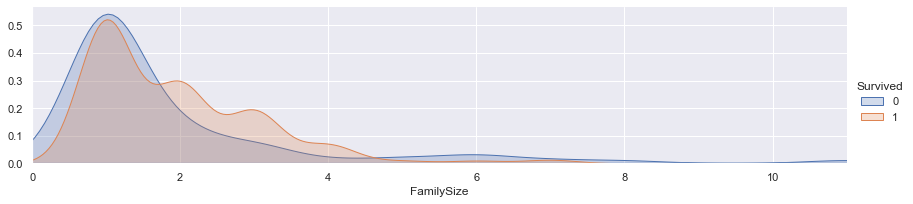

In [41]:
#家族人口/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [42]:
#家族人口的Mapping Function
#請輸入程式碼
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [43]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# 資料清洗

In [44]:
#刪除Sibsp, Parch, Ticket
#請輸入程式碼
features_drop = ['Ticket','SibSp','Parch','PassengerId']
dataset = dataset.drop(features_drop,axis=1)

In [45]:
#設定預測目標變數與解釋變數
#請輸入程式碼
dataset_data = dataset.drop('Survived',axis=1)
dataset_target = dataset['Survived']

#survived為series,加上中括號轉為DF
dataset_target2 = dataset[['Survived']]

dataset_data.shape, dataset_target.shape, dataset_target2.shape

((891, 8), (891,), (891, 1))

In [46]:
#目前的所有解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [225]:
#確認欄位的資料型態均為數值型別
#請輸入程式碼
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [226]:
dataset.to_csv('titanic_train.csv', index=False)

# 建置模型-DNN

In [48]:
#導入keras與sklearn
#請輸入程式碼
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing

In [49]:
#建立模型函式 
def build_model():
    model = Sequential()
    model.add(Dense(input_dim=8,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [50]:
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [51]:
#feature標準化
#請輸入程式碼
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures = minmax_scale.fit_transform(dataset_data)


In [53]:
#訓練模型
#請輸入程式碼
model = build_model()
#開始訓練模型
#請輸入程式碼
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
train_history = model.fit(scaledFeatures,dataset_target,validation_split = 0.2,batch_size=30,epochs=20)
#顯示訓練結果
#請輸入程式碼
score = model.evaluate(x=scaledFeatures,y=dataset_target)
print ('\nTrain Loss:', score[0])
print ('\nTrain Acc:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                360       
                                                                 
 activation_4 (Activation)   (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 100)               4100      
                                                                 
 activation_5 (Activation)   (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

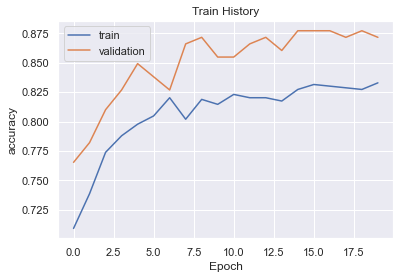

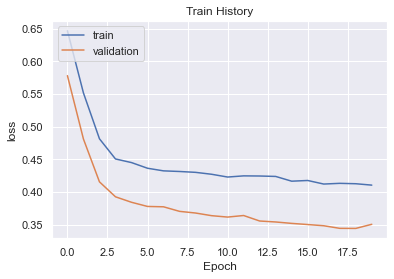

In [54]:
#顯示訓練結果
#請輸入程式碼
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

# 測試模型

In [147]:
#將測試資料按照和訓練資料一樣的方式做欄位的轉換
testdata = pd.read_csv('input/test.csv')

In [148]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [149]:
testdata['Title'] = testdata['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
testdata["Title"].value_counts()
#titlemapping


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [150]:
testdata['Title'] = testdata['Title'].replace({'Dr':'Master', 'Rev':'Master','Col':'Master','Ms':'Master','Dona':'Master'})
title_mapping = {"Mr": 0,"Miss": 1,"Mrs": 2,"Master": 3}
testdata['Title'] = testdata['Title'].map(title_mapping)

In [151]:
testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [152]:
testdata.drop('Name',axis=1,inplace = True)

In [154]:
sex_mapping = {'male':0, 'female':1}
testdata['Sex'] = testdata['Sex'].map(sex_mapping)

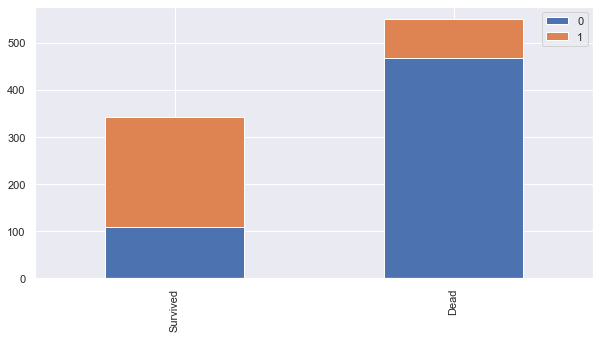

In [155]:
bar_chart('Sex')

In [156]:
testdata['Age'].fillna(testdata.groupby("Title")["Age"].transform('median'), inplace = True)
testdata["Age"]

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    28.5
414    39.0
415    38.5
416    28.5
417    10.0
Name: Age, Length: 418, dtype: float64

In [157]:
testdata.loc[testdata['Age']<= 16,'Age'] = 0
testdata.loc[(testdata['Age'] > 16) & (testdata['Age'] <= 26),'Age'] = 1
testdata.loc[(testdata['Age'] > 26) & (testdata['Age'] <= 36),'Age'] = 2
testdata.loc[(testdata['Age'] > 36) & (testdata['Age'] <= 62),'Age'] = 3
testdata.loc[testdata['Age'] > 62,'Age'] = 4

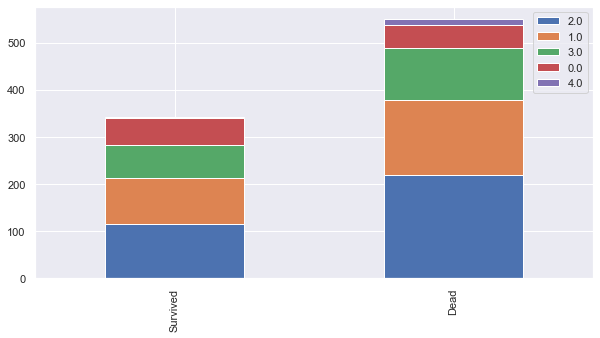

In [158]:
bar_chart('Age')

<AxesSubplot:>

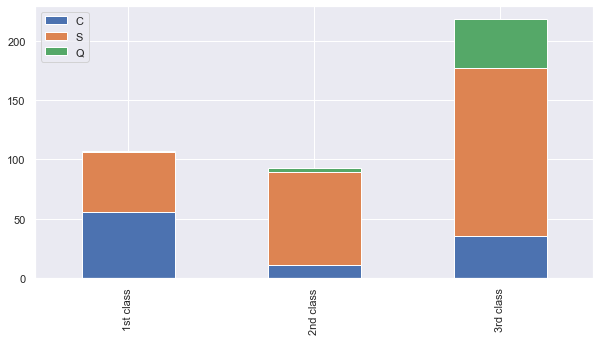

In [159]:
Pclass1 = testdata[testdata['Pclass']==1]['Embarked'].value_counts()
Pclass2 = testdata[testdata['Pclass']==2]['Embarked'].value_counts()
Pclass3 = testdata[testdata['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

<AxesSubplot:>

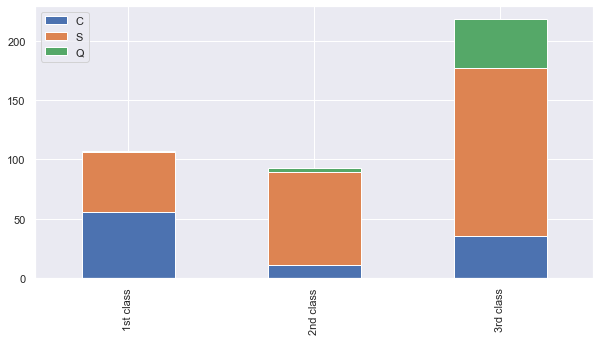

In [112]:
Pclass1 = testdata[testdata['Pclass']==1]['Embarked'].value_counts()
Pclass2 = testdata[testdata['Pclass']==2]['Embarked'].value_counts()
Pclass3 = testdata[testdata['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [160]:
testdata["Embarked"] = testdata["Embarked"].fillna("S")

In [161]:
embarked_mapping = {'S':0, 'C':1,'Q':2}
testdata['Embarked'] = testdata['Embarked'].map(embarked_mapping)

In [162]:
testdata.head(100)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,0,1.0,0,0,350033,7.7958,NaN,0,0
96,988,1,1,4.0,1,0,19877,78.8500,C46,0,2
97,989,3,0,2.0,0,0,STON/O 2. 3101268,7.9250,NaN,0,0
98,990,3,1,1.0,0,0,347471,7.8542,NaN,0,1


In [173]:
testdata['Ticket'].fillna(testdata.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [195]:
testdata.head(50)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8
5,3,0,0.0,0.0,2.0,0,0,0.0
6,3,1,2.0,0.0,2.0,2,1,0.0
7,2,0,1.0,1.0,2.0,0,0,0.8
8,3,1,1.0,0.0,2.0,1,2,0.0
9,3,0,1.0,1.0,2.0,0,0,0.8


In [175]:
testdata.loc[ testdata['Fare'] <= 17, 'Fare'] = 0
testdata.loc[(testdata['Fare'] > 17) & (testdata['Fare'] <= 30),'Fare'] = 1
testdata.loc[(testdata['Fare'] > 30) & (testdata['Fare'] <= 100),'Fare'] = 2
testdata.loc[ testdata['Fare'] > 100, 'Fare'] = 3

In [177]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [178]:
testdata['Cabin'].value_counts()

B57 B59 B63 B66    3
A34                2
B45                2
F4                 2
C101               2
                  ..
F2                 1
B61                1
C46                1
B11                1
C32                1
Name: Cabin, Length: 76, dtype: int64

In [179]:
testdata['Cabin'] = testdata['Cabin'].str[:1]
testdata['Cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

<AxesSubplot:>

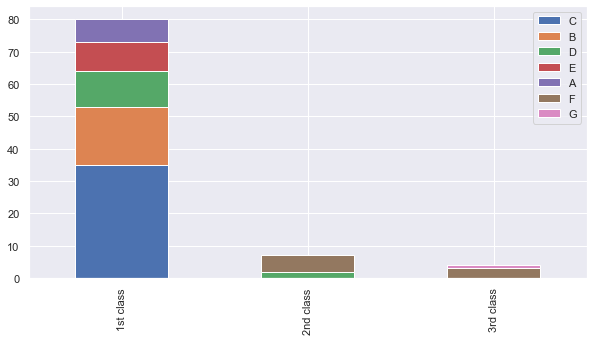

In [180]:
Pclass1 = testdata[testdata['Pclass']==1]["Cabin"].value_counts()
Pclass2 = testdata[testdata['Pclass']==2]["Cabin"].value_counts()
Pclass3 = testdata[testdata['Pclass']==3]["Cabin"].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [181]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
testdata['Cabin'] = testdata['Cabin'].map(cabin_mapping)

In [182]:
testdata

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,1,3.0,0,0,PC 17758,3.0,0.8,1,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,0


In [183]:
testdata['Cabin'].fillna(testdata.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [184]:
testdata

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,2.0,0,0
414,1306,1,1,3.0,0,0,PC 17758,3.0,0.8,1,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,0,0
416,1308,3,0,2.0,0,0,359309,0.0,2.0,0,0


In [185]:
testdata["FamilySize"] = testdata["SibSp"] + testdata["Parch"] + 1

In [186]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
testdata['FamilySize'] = testdata['FamilySize'].map(family_mapping)

In [187]:
features_drop = ['Ticket','SibSp','Parch','PassengerId']
testdata = testdata.drop(features_drop,axis=1)

In [188]:
testdata

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0,0.0
414,1,1,3.0,3.0,0.8,1,3,0.0
415,3,0,3.0,0.0,2.0,0,0,0.0
416,3,0,2.0,0.0,2.0,0,0,0.0


In [189]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        417 non-null    float64
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   Title       418 non-null    int64  
 7   FamilySize  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [196]:
testdata = testdata.fillna(0)

In [206]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures_test = minmax_scale.fit_transform(testdata)

In [214]:
#使用model.predict預測生還機率
#請輸入程式碼
probability = model.predict(scaledFeatures_test)
probability

array([[0.09368342],
       [0.4567294 ],
       [0.11557695],
       [0.09869397],
       [0.60734296],
       [0.20195636],
       [0.7136874 ],
       [0.18569005],
       [0.8705709 ],
       [0.11534148],
       [0.09869397],
       [0.28515816],
       [0.97030413],
       [0.11014354],
       [0.96633875],
       [0.9625949 ],
       [0.15961486],
       [0.13832903],
       [0.3546288 ],
       [0.6683204 ],
       [0.29552627],
       [0.7265017 ],
       [0.9729476 ],
       [0.50786966],
       [0.96258473],
       [0.07203472],
       [0.97270924],
       [0.13832903],
       [0.32915127],
       [0.08728722],
       [0.1316241 ],
       [0.22675678],
       [0.48360264],
       [0.36735097],
       [0.3664006 ],
       [0.13832903],
       [0.5759622 ],
       [0.5759622 ],
       [0.12971729],
       [0.15727597],
       [0.06934628],
       [0.3622003 ],
       [0.07972947],
       [0.9277466 ],
       [0.9678103 ],
       [0.12971729],
       [0.26483965],
       [0.093

In [215]:
#獲得模型的weights
#請輸入程式碼
W, b = model.layers[0].get_weights()
print("weight = {},\n\n biases={}".format(W,b))

weight = [[ 3.59870791e-01 -1.54935703e-01  2.32796490e-01  2.15244234e-01
   3.90078872e-01  4.10377569e-02  3.63913298e-01 -3.51084054e-01
   2.95566861e-02  2.00212896e-01 -2.60356605e-01  3.26641470e-01
   5.87498955e-02  2.97432691e-01 -1.33119449e-01 -1.17518723e-01
  -8.72122273e-02 -1.05052307e-01 -2.33915508e-01  2.20394656e-01
  -1.21330619e-02  2.47116596e-01  1.60653144e-01 -6.57457113e-02
  -2.19916970e-01  6.34101704e-02 -1.05164342e-01  1.52362138e-01
   3.24905276e-01  6.79751337e-02 -1.30267918e-01 -4.54470329e-02
   7.52497166e-02 -2.79611826e-01  1.09786831e-01 -3.31972659e-01
  -8.96027684e-02 -2.98203863e-02 -4.75784857e-03  2.33485386e-01]
 [-5.14778458e-02  6.83127120e-02 -3.47638756e-01  2.87607405e-02
   4.56434377e-02  1.10153511e-01 -2.37896606e-01 -2.43751019e-01
   1.56689763e-01  2.14332908e-01 -2.08519176e-01 -4.78756651e-02
   2.22884566e-01  2.35168785e-01  3.72931004e-01  2.55416930e-01
   1.44121304e-01 -1.83020413e-01 -9.28253829e-02  9.80291292e-02


In [216]:
#儲存模型
#請輸入程式碼
model.save('dnnfortitanic1.h5')

In [ ]:
#from keras.models import load_model
#model = load_model('dnnfortitanic.h5')

In [217]:
probability = probability.flatten()

In [219]:
probability = probability.round()

In [222]:
probability = np.asarray(probability, dtype = int)

In [223]:
probability

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [224]:
testdata_write = pd.read_csv('input/test.csv')
submission = pd.DataFrame({
                            "PassengerId":testdata_write['PassengerId'],
                            "Survived":probability
                            })
submission.to_csv('submission1.csv',index = False)